## PROJECT CAPSTONE CAREER EX

### **PROJECT INTRODUCTION**

The aim of this project is to develop a machine learning model to predict whether a person’s income exceeds $50K/yr based on their demographic and employemnt features. By leveraging various census data, i will explore the data, engineer relevant features, build and evaluate your predictive model, and provide insights from the data. It is a Classification task problem where an individualn income is either less than 50k or greater than 50k.



### Data Collection and Preparation

 libaries and Data Importation:

Load the dataset containing the census data.

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

#Importing sklearn, models, functions and classes Machine Learning Libraries 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (
 precision_score,
 recall_score,
 accuracy_score,
 confusion_matrix,
 classification_report,
 roc_auc_score,
 roc_curve,
 auc,
 mean_squared_error)

# installinag and importing xgb00st
# !pip install xgboost

# After installation i comented it since requiremnt aremet
import xgboost as xgb
from xgboost import XGBClassifier

#modules for Saving our model
import joblib, pickle

In [6]:
#importing my data and viewing the first few rows to see and inspect the structure
file = "income_data.csv"
df = pd.read_csv(file)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Dataset Overview
The dataset consists of 48,842 entries, each representing an individual's census data. It contains the following 15 features:to $50K per year (<=50K,>50K). 

The columns are:

- Age: The age of the individual.
-  Workclass: The employment status of the individual (e.g., Private, Self-emp-not-inc, State-gov).
- Fnlwgt: The final weight, which represents the number of people the census believes the entry represents.
- Education: The highest level of education attained by the individual.
- Education-num: The number of years of education completed.
- Marital-status: The marital status of the individual (e.g., Never-married, Married-civspouse).
- Occupation: The occupation of the individual (e.g., Adm-clerical, Exec-managerial).
- Relationship: The individual's relationship status within a family (e.g., Not-in-family, Husband).
- Race: The race of the individual (e.g., White, Black).
-  Sex: The gender of the individual.
-  Capital-gain: Capital gains recorded for the individual.
-  Capital-loss: Capital losses recorded for the individual.
-  Hours-per-week: The number of hours worked per week.
-  Native-country: The native country of the individual.
-  Income: The target variable indicating whether the individual's income is greater than 50K  or less than or equal to 50K per year.


### DATA EXPLORATION AND CLEANING

In [8]:
# Using df.info tp view the compressive form of my data
df.info()
print('===============================================================')
print('This shows that my data contains 48842 rows and a total of 15 columns, having both numerical data(6) and categorical data(9)')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
This shows that my data contains 48842 rows and a total of 15 columns, having both numerical 

In [9]:
# Using the describe method to give basic statistics about the numerical features of my data
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### Data Cleaning

I clean and handle my data  appropriately by checking for missing values, duplicated values, wrongly named rows and dropping any columns thats not needed in the analysis.

In [15]:
# checking for any duplicated values.
print(df.duplicated().sum())
# it shows that there 48 duplicatd values. i dropped the duplicates
print(df.drop_duplicates(inplace=True))

48
None


In [17]:
# Checked for missing values
print(df.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [19]:
# filling in missing values presents in Work-Class, Ocuppation and Native country by the most prevelent

df['workclass'] = df['workclass'].fillna(df['workclass'].mode().values[0])

df['occupation'] = df['occupation'].fillna(df['occupation'].mode().values[0])

df['native-country'] = df['native-country'].fillna(df['native-country'].mode().values[0])

In [21]:
 #Displaying Unique values of my categorical columns to check if there are wrongly named values
display(df['workclass'].unique())
print("=================")
display(df['education'].unique())
print("=================")
display(df['native-country'].unique())
print("=================")
display(df['marital-status'].unique())
print("=================")
display(df['occupation'].unique())
print("=================")
display(df['relationship'].unique())
print("=================")
display(df['race'].unique())
print("=================")
display(df['income'].unique())


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

array(['<=50K', '>50K'], dtype=object)

In [23]:
# It can be observed that there are rows in our dataset with "?"  so droping the number of rows with '?' value
# So i dropped them
df = df.drop(df[df['workclass'] == '?'].index)
df = df.drop(df[df['occupation'] == '?'].index)
df = df.drop(df[df['native-country'] == '?'].index)

In [25]:
# Dropping the fnlwgt, Education num and Relationship from my data set

df = df.drop(axis=1, columns=["fnlwgt", "education-num","relationship"])

In [27]:
# Checking the new shape of my data
df.shape

(46396, 12)

It can be seen that after cleaning my data, the data set is now left 46951 rows and 12 columns

## Performing Exploratory Data Analysis (EDA)

Note that from the goal of the task given, my target variable would be the inome column.
Now i will provide insights and find the relationship between income and other features with visualisations.

### A. Income Distribution

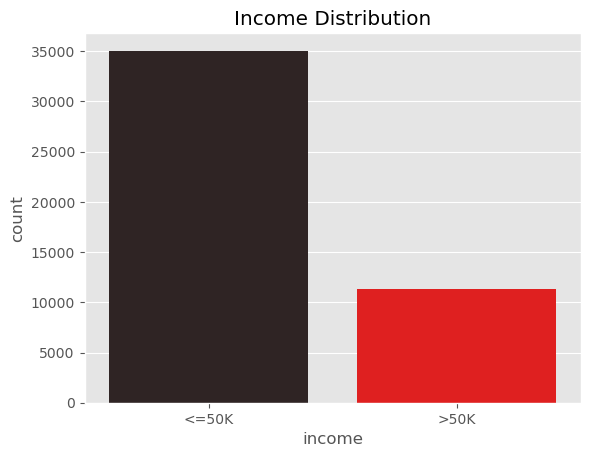

In [33]:
# plotting a bar chat to see the distribution of income
sns.countplot(x ='income', palette='dark:red', hue = 'income', data=df)
plt.title('Income Distribution')
plt.show()

insight: the data set is inbalanced. this shows that a large amount of persons earns less than 50k(76.3%) while just a fraction earns more than 50k (23.7%)

### B. Relationship between Gender and income

income,<=50K,>50K
sex,,
Female,13486,1702
Male,21562,9646


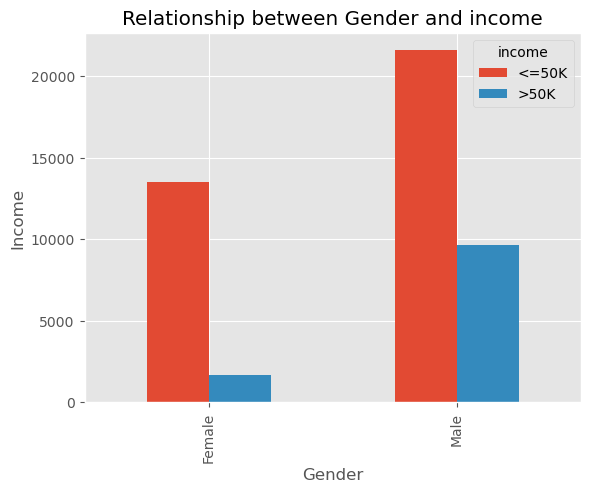

In [37]:
# checking the relationship between gender and income by using the groupby function

gender_income = df.groupby(['sex', 'income']).size().unstack(fill_value=0)
display(gender_income)

# plotting a bar chat to see the Relationship between Gender and income
y= gender_income.plot(kind = "bar",
 title = ('Relationship between Gender and income'))

plt.xlabel("Gender")
plt.ylabel("Income")
plt.show()

### C. Relationship between Race and income

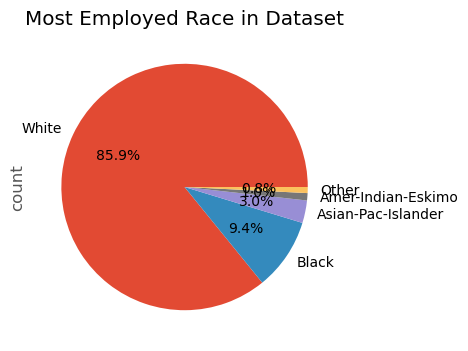

In [41]:
# Checking the Most Employed Race in Dataset using pie chart

df["race"].value_counts().plot(kind = "pie",title = "Most Employed Race in Dataset",
                               figsize = (5,4), autopct = '%1.1f%%')
plt.show()

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,392,53
Asian-Pac-Islander,992,381
Black,3832,545
Other,320,46
White,29512,10323


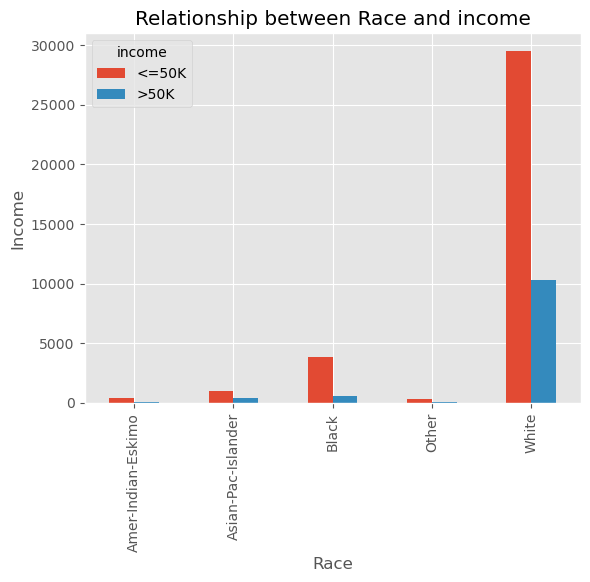

In [43]:
# using thegroupby function to check the relationship and also plooting a  barchat to show visualisation

race_income = df.groupby(['race', 'income']).size().unstack(fill_value=0)
display(race_income)


race_income.plot(kind = "bar",
 title = ('Relationship between Race and income'))

plt.xlabel("Race")
plt.ylabel("Income")
plt.show()

### D. Relationship between income by education level

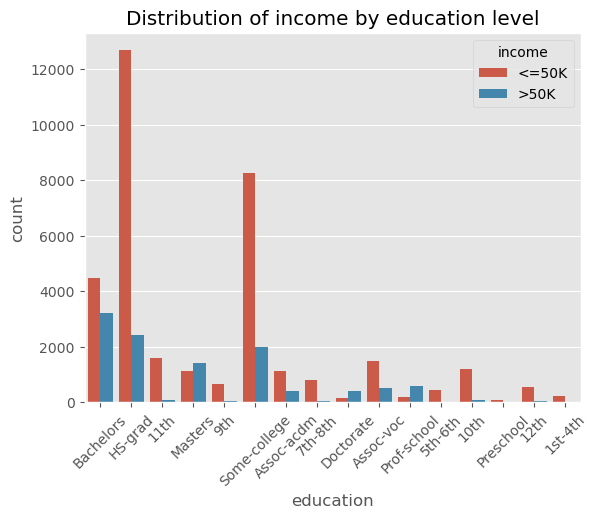

In [46]:
# plotting a bar chat showing relationship between income by education level

sns.countplot(x='education', hue ='income', data=df)
plt.title('Distribution of income by education level')
plt.xlabel('education')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

### E. Distribution of income by occupation

In [49]:
# showing the Distribution of income by occupation
occupation_income = df.groupby(['occupation', 'income']).size().unstack(fill_value=0)
display(occupation_income)

income,<=50K,>50K
occupation,,
Adm-clerical,4798,759
Armed-Forces,10,5
Craft-repair,4672,1361
Exec-managerial,3133,2875
Farming-fishing,1307,173
Handlers-cleaners,1916,135
Machine-op-inspct,2615,366
Other-service,4638,199
Priv-house-serv,231,3


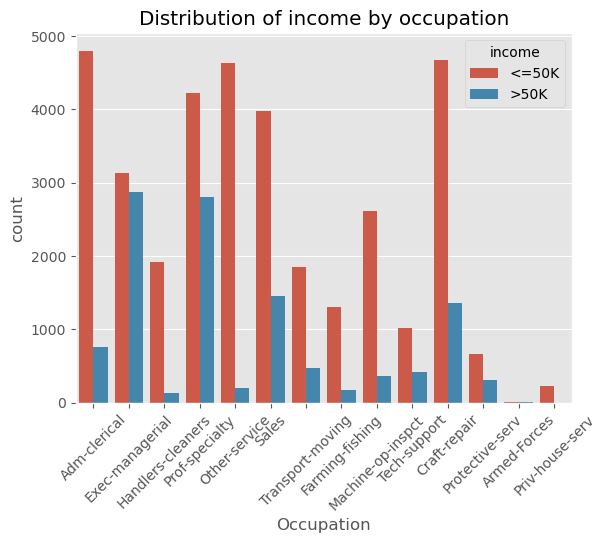

In [51]:
# plotiing a barchat to show the relationship between distribution of income by occupation.
sns.countplot(x='occupation', hue ='income', data=df)
plt.title('Distribution of income by occupation')
plt.xlabel('Occupation')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

### F. Distribution of income by Work-Class

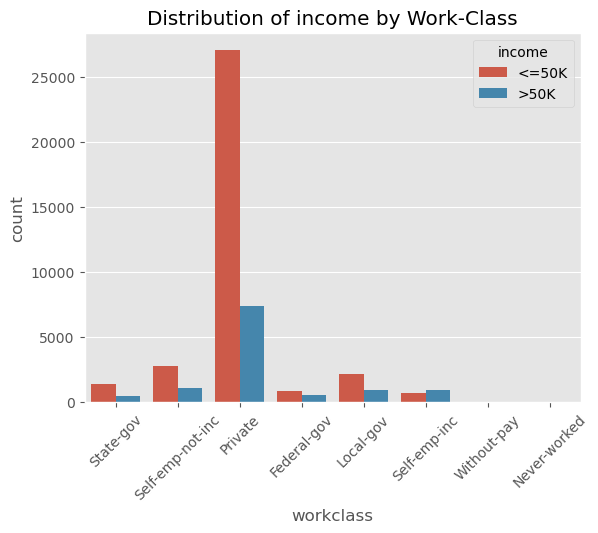

In [54]:
# Distribution of income by Work-Class using barchart

sns.countplot(x='workclass', hue ='income', data=df)
plt.title('Distribution of income by Work-Class')
plt.xlabel('workclass')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

### G. Relationship between income and the numerical fetures

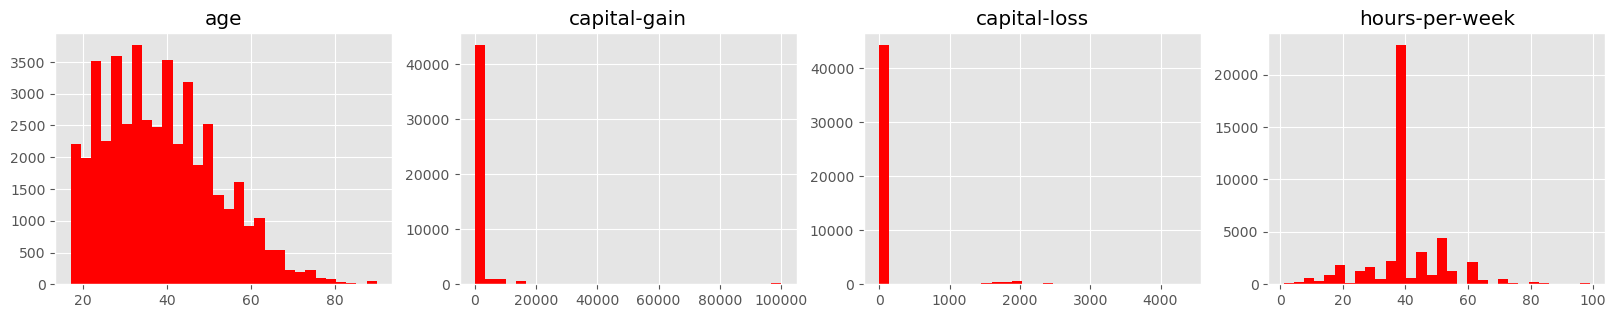

In [57]:
# plotting a chat to show the relationship between income and the numerical fetures

df_numerals = df.select_dtypes(include=['int64']).columns

plt.figure(figsize=(20, 15))
for a, col in  enumerate(df_numerals,1):
    plt.subplot(4,4,a)
    plt.hist(df[col], bins=30, color='red')
    plt.title(col)
# plt.tight_layout()
plt.show()

,age,capital-gain,capital-loss,hours-per-week
age,1.000000,0.078709,0.058283,0.091817
capital-gain,0.078709,1.000000,-0.031862,0.083687
capital-loss,0.058283,-0.031862,1.000000,0.053245
hours-per-week,0.091817,0.083687,0.053245,1.000000


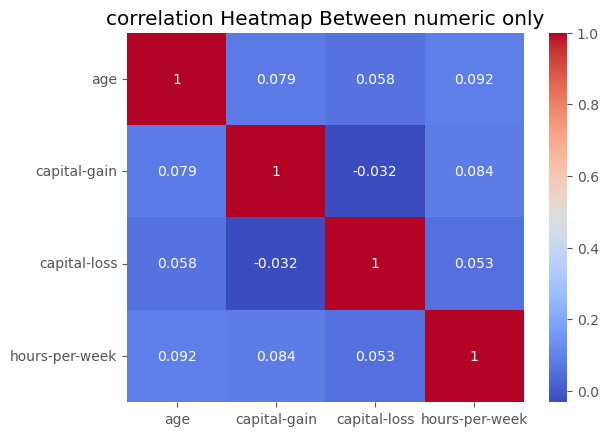

In [59]:
# Creating a new dataframe containing just the numerical variables and assign it to an alias

df_num = df.select_dtypes(include=['number'])
df_num.corr()
num_corr = df_num.corr()
display(num_corr)
#Checking the correlation between "age", "work hour" and "number of education" using heatmap.

sns.heatmap(num_corr, annot = True, cmap = 'coolwarm')
plt.title('correlation Heatmap Between numeric only')
plt.show()

 insight: it shows that age and hours-per- week are highly correlated

In [ ]:
 ### converted my Target variable income to binary 1 qnd 0 
# df['income'] =df['income'].apply(lambda x: 0 if x == '<=50k' else 1)

## DATA PREPROCESSING

### Encoding Categorical Variables

In [64]:
# Label Encoding for feature variable
# Label encoding the income variable and turning it into dataframe
lab_enc = LabelEncoder()

df['income'] = lab_enc.fit_transform(df['income'])

pd.DataFrame(df['income'], columns =['income'])

,income
0,0
1,0
2,0
3,0
4,0
...,...
48837,0
48838,0
48839,0
48840,0


In [66]:
# seprating my columns into categorical and numerical columns

df_cat= df.select_dtypes(exclude=np.number)

df_num= df.select_dtypes(include=np.number).drop(axis=1, columns=["income"])

In [68]:
# encoding categorical variables

one_hot = OneHotEncoder(sparse_output=False)

encoded_cat = one_hot.fit_transform(df_cat)

#  making a dataframe
encd_cat_df = pd.DataFrame(encoded_cat, columns= one_hot.get_feature_names_out())

### Feature Scaling
### Standardizing Numerical Features

In [71]:
# Creating a StandardScaler object

std_scale = StandardScaler()

# Fitting the scaler to the data and transform

scaled = std_scale.fit_transform(df_num)
col = std_scale.get_feature_names_out()

scaled_df = pd.DataFrame(scaled, columns= col)

In [73]:
# joining both the scaled dataframe and encoded categorical dataframe

data =pd. concat([scaled_df,encd_cat_df], axis = 1)

## MODEL DEVELOPMENT

In [220]:
#Separate it into the features (X) and labels (y)

# Separate it into the features (X) and labels (y)

X = data
y = df['income']

### split my data into train and test

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

In [81]:
# confirm shape of new data set
print(X_test.shape[0] == y_test.shape[0])
print(X_train.shape[0] == y_train.shape[0])

True
True


### SELECTING AND BUILDING OUR MODEL

The models i will be using are:
- logistic regression model
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- Dcision Tree
- Random Forest and
- XG Boost

### 1. Logistic Regression

In [85]:

log_model = LogisticRegression(max_iter=2000)

log_model

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [86]:
# Performing evaluation and prediction

y_pred = log_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8519396551724138

In [89]:
# 3 CONFUSION MATRIX

# we check the confusion matrix using confusion_matrix(y_test, y_pred)
c_max = confusion_matrix(y_test, y_pred)
c_max

array([[3295,  250],
       [ 437,  658]], dtype=int64)

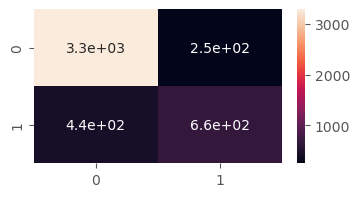

In [91]:
# plotting a heatmap
fig = plt.figure(figsize=(4,2))
sns.heatmap(c_max, annot=True)
plt.show()

In [200]:
print(precision_score(y_test, y_pred, average="macro"))
print("===========================================")
print(precision_score(y_test, y_pred, average="weighted"))
print("===========================================")
roc_auc_score(y_test,y_pred)

0.8037871061565411
0.8455625116412748


0.7651956901159909

In [95]:
# Classification_report gives us an overview to view our precision, recall, f1 and accuracy

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3545
           1       0.72      0.60      0.66      1095

    accuracy                           0.85      4640
   macro avg       0.80      0.77      0.78      4640
weighted avg       0.85      0.85      0.85      4640



### 2. Using KNeighbors Classifier

In [98]:
# assigning and training my model
knn_classifier= KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

In [99]:
# Evaluate the model and performing prediction
y_KC_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_KC_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8267241379310345


In [190]:
print(precision_score(y_test,y_KC_pred, average="macro"))
print("===========================================")
print(precision_score(y_test, y_KC_pred, average="weighted"))
print("===========================================")
roc_auc_score(y_test,y_KC_pred)

0.760984549937559
0.8220391331763821


0.7449066470879946

In [100]:
# showing the classification report of our model
print(classification_report(y_test, y_KC_pred))
print("===========================================")

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3545
           1       0.65      0.59      0.62      1095

    accuracy                           0.83      4640
   macro avg       0.76      0.74      0.75      4640
weighted avg       0.82      0.83      0.82      4640



0.7449066470879946

In [101]:
# CONFUSION MATRIX
# we check the confusion matrix using confusion_matrix(y_test, y_KC_pred)
c_KC_max = confusion_matrix(y_test, y_KC_pred)
c_KC_max

array([[3190,  355],
       [ 449,  646]], dtype=int64)

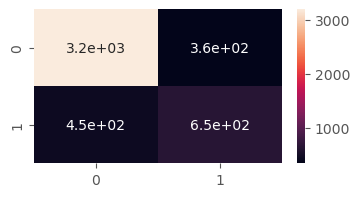

In [211]:
# plotting a heatmap
fig = plt.figure(figsize=(4,2))
sns.heatmap(c_KC_max, annot=True)
plt.show()

### 3. Using Support Vector Machine

In [107]:
# assigning and training my model

svm_model = SVC(kernel='linear')

svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [208]:
# Evaluate the model and performing prediciton
y_svm_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test,y_svm_pred )
print(f'Accuracy: {accuracy}')

Accuracy: 0.8452586206896552


In [192]:
print(precision_score(y_test,y_svm_pred, average="macro"))
print("===========================================")
print(precision_score(y_test,y_svm_pred, average="weighted"))
print("===========================================")
roc_auc_score(y_test,y_svm_pred)

0.7982740254979634
0.8371370431278232


0.7450444706352121

In [172]:
# Classification_report gives us an overview to view our precision, recall, f1 and accuracy
print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3545
           1       0.72      0.56      0.63      1095

    accuracy                           0.85      4640
   macro avg       0.80      0.75      0.77      4640
weighted avg       0.84      0.85      0.84      4640



In [111]:
# CONFUSION MATRIX
# we check the confusion matrix using confusion_matrix(y_test, y_svm_pred)
c_svm_max = confusion_matrix(y_test, y_svm_pred)
c_svm_max

array([[3314,  231],
       [ 487,  608]], dtype=int64)

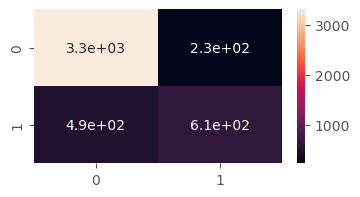

In [213]:
# plotting a heatmap
fig = plt.figure(figsize=(4,2))
sns.heatmap(c_svm_max, annot=True)
plt.show()

### 4. Using Decision Tree Algorithm

In [113]:
# assigning and alias and raining our model
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [114]:
# performing prediciton
y_dt_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_dt_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8258620689655173


In [194]:
print(precision_score(y_test,y_dt_pred, average="macro"))
print("===========================================")
print(precision_score(y_test,y_dt_pred, average="weighted"))
print("===========================================")
roc_auc_score(y_test, y_dt_pred)

0.7586478374127708
0.8249954874144746


0.756018831591218

In [174]:
# Classification_report gives us an overview to view our precision, recall, f1 and accuracy
print(classification_report(y_test, y_dt_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3545
           1       0.63      0.62      0.63      1095

    accuracy                           0.83      4640
   macro avg       0.76      0.76      0.76      4640
weighted avg       0.82      0.83      0.83      4640



In [116]:
# CONFUSION MATRIX
# we check the confusion matrix using confusion_matrix(y_test, y_dt_pred)
c_dt_max = confusion_matrix(y_test, y_dt_pred)
c_dt_max

array([[3149,  396],
       [ 412,  683]], dtype=int64)

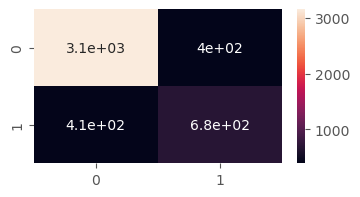

In [215]:
# plotting a heatmap
fig = plt.figure(figsize=(4,2))
sns.heatmap(c_dt_max, annot=True)
plt.show()

## Ensemble learning

#### Random forest algorithim

In [180]:
rand_f_model= RandomForestClassifier(n_estimators=100, random_state=42)
rand_f_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [181]:
y_rand_pred =rand_f_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test,y_svm_pred )
print(f'Accuracy: {accuracy}')

Accuracy: 0.8452586206896552


In [196]:
print(precision_score(y_test,y_rand_pred, average="macro"))
print("===========================================")
print(precision_score(y_test,y_rand_pred, average="weighted"))
print("===========================================")
roc_auc_score(y_test,y_rand_pred)

0.7849405372801095
0.8366635571516691


0.7609167197995762

In [121]:
# Classification_report gives us an overview to view our precision, recall, f1 and accuracy
print(classification_report(y_test, y_rand_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      3545
           1       0.69      0.61      0.64      1095

    accuracy                           0.84      4640
   macro avg       0.78      0.76      0.77      4640
weighted avg       0.84      0.84      0.84      4640



0.7609167197995762

### xgboost

In [123]:
xgb_model= XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [124]:
y_xg_pred = xgb_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test,y_xg_pred )
print(f'Accuracy: {accuracy}')

Accuracy: 0.8691810344827586


In [198]:
print(precision_score(y_test,y_rand_pred, average="macro"))
print("===========================================")
print(precision_score(y_test,y_xg_pred, average="weighted"))
print("===========================================")
roc_auc_score(y_test,y_xg_pred)

0.7849405372801095
0.8646234019712783


0.7944670930180137

In [125]:
# Classification_report gives us an overview to view our precision, recall, f1 and accuracy
print(classification_report(y_test,y_xg_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3545
           1       0.76      0.65      0.70      1095

    accuracy                           0.87      4640
   macro avg       0.83      0.79      0.81      4640
weighted avg       0.86      0.87      0.87      4640



0.7944670930180137

## Roc_Auc curve

In [129]:
# using predictproba for poredicting our models

log_pred = log_model.predict_proba(X_test)[:,1]
tree_pred = dt_classifier.predict_proba(X_test)[:,1]
knn_pred= knn_classifier.predict_proba(X_test)[:,1]
rand_f_pred= rand_f_model.predict_proba(X_test)[:,1]
xgb_pred= xgb_model.predict_proba(X_test)[:,1]

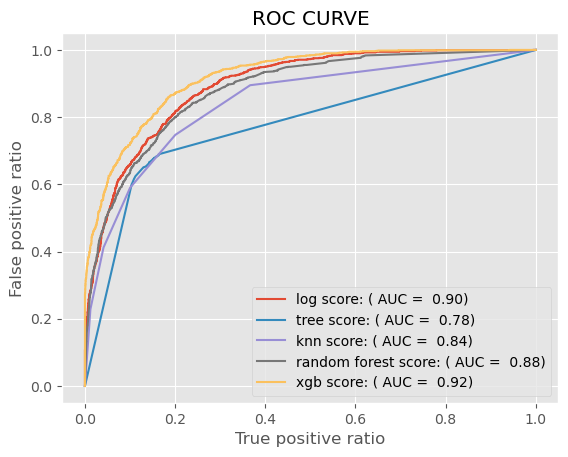

In [135]:
 # using matplotlib for roc curve
fpr_log, tpr_log, threshold= roc_curve(y_test, log_pred)
fpr_tree, tpr_tree, threshold= roc_curve(y_test, tree_pred)
fpr_knn, tpr_knn, threshold= roc_curve(y_test, knn_pred)
fpr_rand_f, tpr_rand_f, threshold= roc_curve(y_test, rand_f_pred)
fpr_xgb, tpr_xgb, threshold= roc_curve(y_test, xgb_pred)


# compputing auc scores
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_knn = auc(fpr_knn, tpr_knn)
auc_rand_f = auc(fpr_rand_f, tpr_rand_f)
auc_xgb = auc(fpr_xgb , tpr_xgb)


# plot the roc_auc curve and naming the x and y axis

plt.plot(fpr_log, tpr_log, label = f"log score: ( AUC = {auc_log: .2f})")
plt.plot(fpr_tree, tpr_tree, label = f"tree score: ( AUC = {auc_tree: .2f})")
plt.plot(fpr_knn, tpr_knn, label = f"knn score: ( AUC = {auc_knn: .2f})")
plt.plot(fpr_rand_f, tpr_rand_f, label = f"random forest score: ( AUC = {auc_rand_f: .2f})")
plt.plot(fpr_xgb , tpr_xgb, label = f"xgb score: ( AUC = {auc_xgb: .2f})")

plt.ylabel("False positive ratio")
plt.xlabel("True positive ratio")
plt.title("ROC CURVE")
plt.legend()
plt.show()

## Hperparameter tuning with grid search

In [138]:
# assigning the modelsto alais thoughive done the above
rf = RandomForestClassifier()
dt =  DecisionTreeClassifier()
sv = SVC(kernel='linear')

In [147]:
# Define the grid of hyperparameters
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

### RandomForestClassifier

In [150]:
# Set up GridSearchCV
grid_rf_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_rf_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [151]:
# Print the best parameters and score
print("Best parameters found: ", grid_rf_search.best_params_)
print("Best cross-validation accuracy: ", grid_rf_search.best_score_)

Best parameters found:  {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy:  0.8627741486898349


### Decision tree

In [153]:
# Define the grid of hyperparameters
param_gridss = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],

}

In [154]:
#  Set up GridSearchCV for dt
grid_dt_search = GridSearchCV(estimator=dt, param_grid=param_gridss, cv=5, n_jobs=-1, scoring='accuracy')

#  Fit the model
grid_dt_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [155]:
#  Print the best parameters and score
print("Best parameters found: ", grid_dt_search.best_params_)
print("Best cross-validation accuracy: ", grid_dt_search.best_score_)

Best parameters found:  {'max_depth': 10, 'min_samples_split': 10}
Best cross-validation accuracy:  0.857098442680827


In [156]:
#saving my models

joblib.dump(log_model, 'my_logisitic_regression_model.pkl')

['my_logisitic_regression_model.pkl']

## SUMMARY AND RECOMENDATIONS

### key insights from my EDA, highlighting patterns and trends

#### **Insights**
- `Age`: very few people under the age of 25 earns >50k
 
- `Gender distribution`: a sgnificant disparity between males and the females. the males dominated the >50k bracket while the females are underrepresented
  
- `Race distribution`: white and asain peope where more dominant in the work force and are more representwd in the higher income group >50k while other race represented the lower income group

- `Occupation`: Executives, tech proffesionals and managerial roles where mostly in the higher income bracket whikew roles in service, labour and clerical work were associated with income <50k

- `Work hours`: people wrking more than 40hours per week  we in the higher income bracket while those who stabdard or fewer easrned less

- `Capital gain/loss`: a large number of individual shoewd zero capital gain/loss and the non-zero gains where more likely to bein the >50k income bracket

- `Educational level`:  individuals withs bachelors degree or higher we significantly associated with the income >50k while those with lower educational background where assiocated with income of <50k


#### **Recommendations**

- `Support capital investment`: Encourage savings sand investments habit to increase capital gains

 - `Upskill programs`: promote higher education and tech training (as career-ex is doing now) to increase income opportunities

 - `Gender difference`: address the despertaties of income between the genders 

 - `Work hour balance`: since hours of work relates to income earned , policy should be balanced well-being and economic mobility


### Performance of my machine learning model, its effectiveness in predicting income level and how it can be improved.


#### **Model Performance**

 I used the Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machines(SVM),  Decision Trees, Random Forest, and XGBOOST Algorithm to build my model. My model achieved:
- Accuracy (% of total correct prediction) of 82% to 86% respectively.

-  Precision (% of predicted income that are correct with average='macro') of 76% to 80%.

-  The ROC-AUC score (its ability to distinguish between > 50k and <50k classes) of 78% to 92%. I had a high accuracy score

Hence:Tthis resuls shows that the model is good but can still missclassify high income individuals, especailly if the data is inbalanced

#### **Limitations**

My model showed a high inbalance in income distribution this cause the model to favour the majority class lowering recal for high income predictions

. Poor encoding of variable like education or native country can reduce model sensitivty and label encoding may introduce bias

. Some columns were weakly corelated and may act as noise while others created bias e.g race since white people dominated the work force



#### **How to improve the model**
i could have perormed deeper in advanced future enginerring by turning my `age` column into a cateogorical data for example classifying the age group of 18-29 as  young adult, adults or mid career 29-45 and seniors to 46-90. i could also have performed on the `hours per week` columns into standard hours, normal hours and long hours

#### **Improvment performed**
i performed hyper parameter tuning witch grid search comparing to models randomforesst and descision tree for the optimization.
